## Final Project Submission

Please fill out:
* Student name: Kevan Muthomi Ndwiga
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL: https://github.com/Kevan-Muthomi/DS-Phase_1_Project.git


# Using  Exploratory Data Analysis to Generate Insights for Microsoft's New Movie Studio


# 1. Business Understanding
## a) Intoduction

Over the years, Microsoft has seen multiple 'big' companies such as Box Office Mojo, IMDB, The Numbers, The Movie and Rotten Tomatoes venture into creation of novies and they have observed the need of delving into the industry which seems rather lucrative as attributed to the success of the featured films at the box office. To achieve this, they intend to conduct research in the industry and come up with decisions that may inform their movie creation strategy

## b) Problem Statement
Microsoft's new movie studio aims to enter the competitive film industry by creating original content. However, lacking expertise in movie production, the studio faces the challenge of understanding the dynamic landscape of successful movies at the box office. 

The objective is to leverage exploratory data analysis (EDA) on diverse movie datasets from sources like Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to identify and interpret trends, patterns, and influential factors contributing to box office success. By extracting actionable insights, the studio seeks to inform strategic decisions regarding the types of films to produce, considering genre preferences, budget allocation, critical ratings, and audience reception.

Ultimately, this analysis aims to guide Microsoft's new movie studio in crafting a targeted content creation strategy aligned with market demands and audience expectations.

## c) Main Objective 
To conduct an exploratory data analysis (EDA) on diverse movie datasets sourced from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. The goal is to derive actionable insights that will aid Microsoft's new movie studio in making informed decisions about the types of films to produce for successful entry and sustainability within the competitive movie industry.

## d)Experimental Design
#### 1. Data Collection
#### 2. Read and check the data
#### 3. Cleaning the data
#### 4. Exploratory Data Analysis
#### 5. Conclusions and Recommendations

# 2.Importing Libraries


In [1]:
#Importing the necessary libraries
import pandas as pd
import sqlite3
import os
import json
import csv
import requests
import matplotlib.pyplot as plt
%matplotlib inline


# 3. Reading the Data


### Reading Data from The Number dataset

In [2]:
#Sample budget data from The Numbers (tn.movie_budgets.csv) dataset
tnmovie_budgets = pd.read_csv('tn.movie_budgets.csv')
tnmovie_budgets.head(20)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


### Reading Data from The MoviesDB dataset

In [3]:
# List of movies from The Movies (tmdb.movies.csv) dataset
tm_movie_list = pd.read_csv('tmdb.movies.csv')
tm_movie_list.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


### Reading the data fro Box Office Mojo dataset

In [4]:
# Sample data from Box Office Mojo (bom.movies_gross.csv)
bom_movie = pd.read_csv('bom.movie_gross.csv')
bom_movie.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


### Reading Data from Rotten Tomatoes dataset(s)

In [5]:
#Fetching sample review data from Rotten Tomatoes (rt.reviews.tsv) dataset
rt_movie_reviews = pd.read_csv('rt.reviews.tsv', sep = '\t', encoding='cp1252').dropna(axis=0)
rt_movie_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


In [6]:
# Fetching sample movie information  data from Rotten Tomatoes (rt.movie_info.tsv) dataset
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_movie_info.head(10)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


### Reading IMDB Data from the IMDB database

In [7]:
#Connecting to the IMDB database
im_db = os.path.join('im.db')
#Opening a connection
conn = sqlite3.connect(im_db)
#Initializing a cursor
cursor = conn.cursor()

In [8]:
#Read Table Names in the IMDB (im.db) database
table_name_query = """
SELECT name 
AS 'Table Names' 
FROM sqlite_master 
WHERE type='table';
"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [9]:
#Selecting rows and columns from the movie_ratings table in the im.db database above
movie_ratings = """
SELECT *
FROM movie_ratings;
"""

pd.read_sql(movie_ratings,conn).head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [10]:
#Selecting data from IMDB movie_ratings table
movie_basics = """
SELECT *
FROM movie_basics;
"""
pd.read_sql(movie_basics,conn).head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


# 4.CLEANING THE DATA

In [11]:
#Removing columns with missing values from Rotten Tomatoes movies_reviews
rt_movie_reviews_cleaned = rt_movie_reviews.dropna(axis=0)
rt_movie_reviews_cleaned.head(-20)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54381,1999,Old baseball wisdom: The best teams win with s...,B+,fresh,Bob Cannon,1,Entertainment Weekly,"April 1, 1993"
54395,2000,"...as far as action flicks go, you could do wo...",2.5/4,fresh,David Nusair,0,Reel Film Reviews,"January 4, 2004"
54396,2000,A moronic action/comedy film.,C-,rotten,Dennis Schwartz,0,Ozus' World Movie Reviews,"November 9, 2003"
54397,2000,A bubbly international cocktail.,3.5/5,fresh,Jurgen Fauth,0,About.com,"October 15, 2003"


In [12]:
#Removing columns with missing value from Rotten Tomatoes movies_info
rt_movie_info_cleaned= rt_movie_info.dropna(axis=0)
rt_movie_info_cleaned.head(10)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM
29,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,"May 16, 2003","Oct 7, 2003",$,"201,010",106 minutes,Lions Gate Films
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,"54,100,000",93 minutes,New Line Cinema
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,"35,565,975",99 minutes,Universal Pictures
69,87,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,"Aug 20, 2010","May 3, 2011",$,"4,806,750",117 minutes,Samuel Goldwyn Films


In [13]:
#Sorting The Numbers Movie budget data by profit generated
# Reading the CSV file into a DataFrame
tnmovie_budgetsmovie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Convert columns to numeric after removing non-numeric characters like commas and dollar signs
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculating the profit
tnmovie_budgets['profit'] = (tnmovie_budgets['worldwide_gross'] + tnmovie_budgets['domestic_gross']) - tnmovie_budgets['production_budget']

# Sorting the DataFrame by the 'profit' column in descending order
tn_sorted_by_profit = tnmovie_budgets.sort_values(by='profit', ascending=False)

# Function to format numbers with commas and dollar signs
def format_currency(value):
    return '${:,}'.format(value)

# Applying formatting to the columns
tn_sorted_by_profit['profit'] = tn_sorted_by_profit['profit'].map(format_currency)
tn_sorted_by_profit['worldwide_gross'] = tn_sorted_by_profit['worldwide_gross'].map(format_currency)
tn_sorted_by_profit['domestic_gross'] = tn_sorted_by_profit['domestic_gross'].map(format_currency)
tn_sorted_by_profit['production_budget'] = tn_sorted_by_profit['production_budget'].map(format_currency)

# Displaying the top 10 rows of the sorted DataFrame with formatted columns
print(tn_sorted_by_profit.head(10))


    id  release_date                                 movie production_budget  \
0    1  Dec 18, 2009                                Avatar    $425,000,000.0   
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens    $306,000,000.0   
42  43  Dec 19, 1997                               Titanic    $200,000,000.0   
6    7  Apr 27, 2018                Avengers: Infinity War    $300,000,000.0   
33  34  Jun 12, 2015                        Jurassic World    $215,000,000.0   
26  27   May 4, 2012                          The Avengers    $225,000,000.0   
41  42  Feb 16, 2018                         Black Panther    $200,000,000.0   
66  67   Apr 3, 2015                             Furious 7    $190,000,000.0   
43  44  Jun 15, 2018                         Incredibles 2    $200,000,000.0   
4    5  Dec 15, 2017     Star Wars Ep. VIII: The Last Jedi    $317,000,000.0   

    domestic_gross   worldwide_gross            profit  
0   $760,507,625.0  $2,776,345,279.0  $3,111,852,904.0  
5   $

In [14]:
#Cleaning IMDB movie_basics data to remove empty rows and columns 
movie_basics_cleaned= pd.read_sql(movie_basics, conn)

# Remove empty rows
movie_basics_cleaned.dropna(how='any', inplace=True)

# Remove empty columns
movie_basics_cleaned.dropna(axis=1, how='any', inplace=True)

# Display the cleaned DataFrame
print(movie_basics_cleaned.head(5))

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
5        2018             75.0                Comedy  


# 5.Exploratory Data Analysis

### IMDB Data Analysis

In [15]:
#Filtering the IMDB ratings information for movies with more than 1000 votes in order to obtain fair ratings 
movie_ratings = """
SELECT *
FROM movie_ratings
WHERE numvotes >=1000
ORDER BY numvotes DESC;
"""

pd.read_sql(movie_ratings,conn).head(10)


,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
5,tt0993846,8.2,1035358
6,tt1130884,8.1,1005960
7,tt2015381,8.1,948394
8,tt1431045,8.0,820847
9,tt1392170,7.2,795227


In [16]:
#Joining the movies_basics and movie_ratings tables to generate necessary/relevant columns
imdb_movies = """
SELECT m.primary_title , m.genres, m.start_year, r.averagerating, r.numvotes
FROM movie_basics m
JOIN movie_ratings r ON m.movie_id = r.movie_id
WHERE numvotes>1000
ORDER BY numvotes DESC; 
"""
pd.read_sql(imdb_movies,conn).head(10)

,primary_title,genres,start_year,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334
3,Django Unchained,"Drama,Western",2012,8.4,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655
5,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358
6,Shutter Island,"Mystery,Thriller",2010,8.1,1005960
7,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394
8,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847
9,The Hunger Games,"Action,Adventure,Sci-Fi",2012,7.2,795227


In [17]:
#Identifying the most popular genre from IMDB dataset
imdb_df = pd.read_sql(imdb_movies,conn)
all_imdb_genres = imdb_df['genres'].str.split(',').explode()

# Counting the occurrences of each genre
genre_counts = all_imdb_genres.value_counts()

# Displaying the five most popular genres
top_5_genres = genre_counts.head(5)

print("The five most popular genres based on the highest number of votes are:")
for idx, (genre, count) in enumerate(top_5_genres.items(), start=1):
    print(f"{idx}. '{genre}' with {count} occurrences.")


The five most popular genres based on the highest number of votes are:
1. 'Drama' with 5044 occurrences.
2. 'Comedy' with 3004 occurrences.
3. 'Action' with 1997 occurrences.
4. 'Thriller' with 1796 occurrences.
5. 'Romance' with 1349 occurrences.


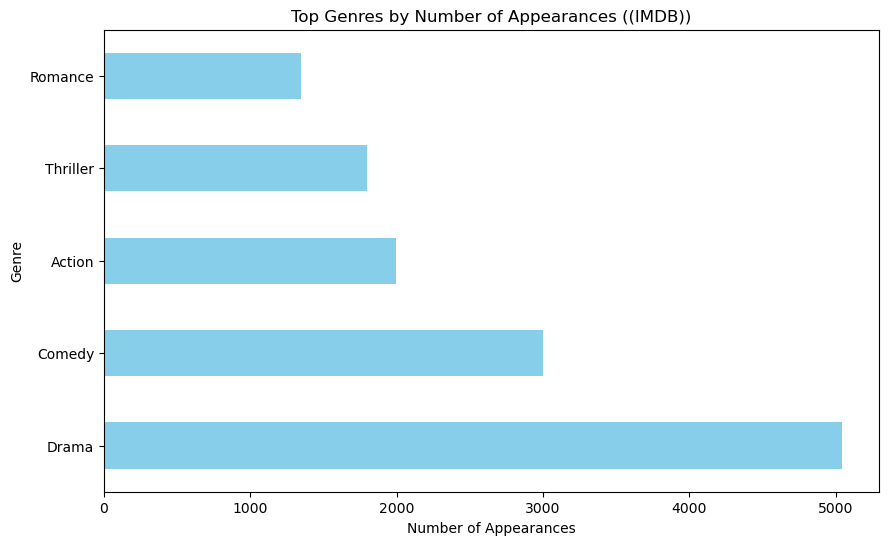

In [18]:
#Visualization from the IMDB data above.
# Displaying the top genres in descending order for better visualization
top_genres = genre_counts.head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_genres.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top Genres by Number of Appearances ((IMDB))')
plt.xlabel('Number of Appearances')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent genre at the top
plt.show()


### The Movie DB Data Analysis



In [19]:
#Generating the list of Genres in The MovieDB dataset using TMDB API
#Defining  TMDb API key
tmdb_api_key = '70f9b8ce1aaffdf5ddb822e3975832a0'  

# URL for fetching the genre list from TMDb API
url = f'https://api.themoviedb.org/3/genre/movie/list?api_key={tmdb_api_key}&language=en-US'

# Make a GET request to fetch the genre list
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    tmdb_genre_data = response.json()  # Parse the JSON response
    tmdb_genre_mapping = {genre['id']: genre['name'] for genre in tmdb_genre_data['genres']}
    print(tmdb_genre_mapping)
else:
    print('Failed to fetch genre data. Status code:', response.status_code)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [20]:
# Sorting The Movies data by movie_title, genre and popularity
# Function to convert genre IDs to their respective names
def get_genres(genre_ids):
    genres = []
    for genre_id in genre_ids:
        if genre_id in tmdb_genre_mapping:
            genres.append(tmdb_genre_mapping[genre_id])
        else:
            genres.append('Unknown')  # If the genre ID is not found in the mapping
    return genres

# Applying the function to the 'genre_ids' column to obtain lists of genres
tm_movie_list['genres'] = tm_movie_list['genre_ids'].apply(lambda x: get_genres(eval(x)))

# Displaying the movie titles along with their corresponding genres
print(tm_movie_list[['title', 'genres','popularity']].head(10))

                                               title  \
0       Harry Potter and the Deathly Hallows: Part 1   
1                           How to Train Your Dragon   
2                                         Iron Man 2   
3                                          Toy Story   
4                                          Inception   
5  Percy Jackson & the Olympians: The Lightning T...   
6                                             Avatar   
7                                        Toy Story 3   
8                                      Despicable Me   
9                                           Megamind   

                                              genres  popularity  
0                       [Adventure, Fantasy, Family]      33.533  
1            [Fantasy, Adventure, Animation, Family]      28.734  
2               [Adventure, Action, Science Fiction]      28.515  
3                        [Animation, Comedy, Family]      28.005  
4               [Action, Science Fiction, Advent

#### Identifying the most popular genres from The MoviesDB

In [21]:
#Identifying the 5 most popular genres
from collections import defaultdict

# Create a defaultdict to aggregate popularity for each genre
genre_popularity = defaultdict(float)

# Iterate through each row in tm_movie_list
for _, row in tm_movie_list.iterrows():
    # Iterate through each genre in the genres list
    for genre in row['genres']:
        # Aggregate popularity for each genre
        genre_popularity[genre] += row['popularity']

# Sort the genres by their total popularity in descending order
tmdb_top_5_popular_genres = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)[:5]

# Display the top 5 genres by popularity
for index, (genre, total_popularity) in enumerate(tmdb_top_5_popular_genres, start=1):
    print(f"{index}. {genre}: Total Popularity - {total_popularity:.3f}")

1. Drama: Total Popularity - 33031.019
2. Comedy: Total Popularity - 21836.135
3. Thriller: Total Popularity - 20365.741
4. Action: Total Popularity - 16965.062
5. Horror: Total Popularity - 11953.708


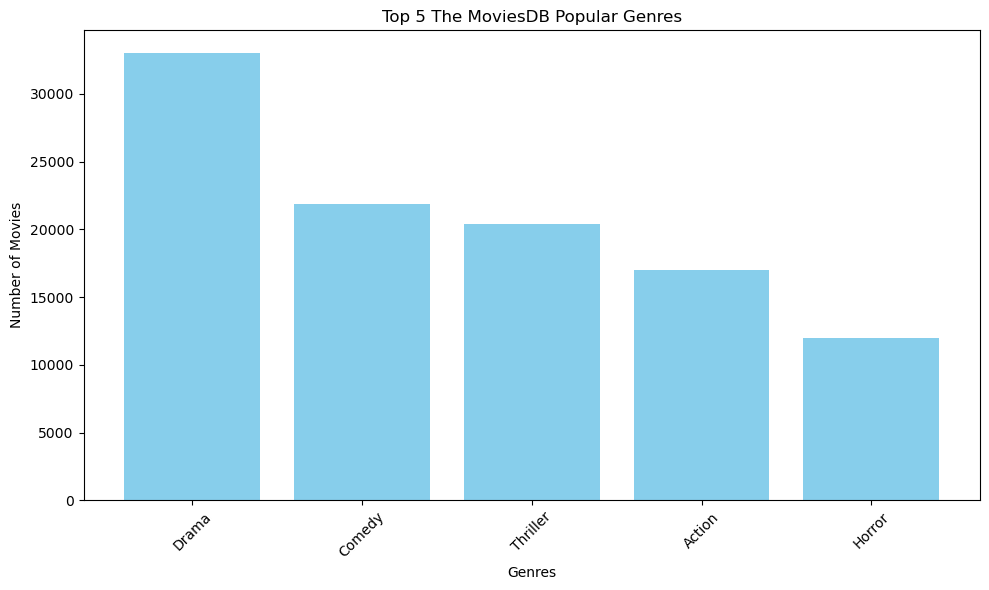

In [22]:
#Creating a visualization for the output above
tmdb_top_genres = [genre[0] for genre in tmdb_top_5_popular_genres]
tmdb_genre_counts = [count[1] for count in tmdb_top_5_popular_genres]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tmdb_top_genres, tmdb_genre_counts, color='skyblue')
plt.title('Top 5 The MoviesDB Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

# Displaying the plot
plt.show()

### Rotten Tomatoes Analysis

In [23]:
#Merging the two cleaned Rotten Tomatoes Data Frames by the most relevant columns
rt_movies_relevant = pd.merge(rt_movie_reviews_cleaned[['id', 'rating', 'fresh']], 
                              rt_movie_info_cleaned[['id', 'genre', 'box_office']], 
                              on='id')

# Displaying the resulting merged DataFrame
print(rt_movies_relevant.head())

   id rating   fresh                              genre box_office
0   3    3/5   fresh  Drama|Science Fiction and Fantasy    600,000
1   3      C  rotten  Drama|Science Fiction and Fantasy    600,000
2   3    2/5  rotten  Drama|Science Fiction and Fantasy    600,000
3   3     B-   fresh  Drama|Science Fiction and Fantasy    600,000
4   3    2/4  rotten  Drama|Science Fiction and Fantasy    600,000


In [24]:
#List of genres from the Rotten Tomatoes dataframe
print(rt_movies_relevant['genre'].unique())

['Drama|Science Fiction and Fantasy' 'Comedy' 'Drama'
 'Action and Adventure|Drama|Science Fiction and Fantasy'
 'Art House and International|Comedy|Drama|Musical and Performing Arts'
 'Action and Adventure|Drama|Horror|Mystery and Suspense' 'Comedy|Drama'
 'Art House and International|Drama|Musical and Performing Arts'
 'Drama|Sports and Fitness' 'Comedy|Drama|Kids and Family'
 'Action and Adventure|Science Fiction and Fantasy'
 'Horror|Mystery and Suspense' 'Comedy|Kids and Family'
 'Action and Adventure|Drama'
 'Action and Adventure|Comedy|Kids and Family'
 'Drama|Musical and Performing Arts'
 'Drama|Horror|Mystery and Suspense|Romance' 'Drama|Romance' 'Horror'
 'Comedy|Western' 'Drama|Mystery and Suspense'
 'Art House and International|Drama|Special Interest'
 'Action and Adventure|Animation|Comedy|Kids and Family'
 'Comedy|Drama|Musical and Performing Arts'
 'Documentary|Musical and Performing Arts'
 'Art House and International|Drama'
 'Action and Adventure|Mystery and Suspense' 

In [27]:
#Identifying the 5 most popular Rotten Tomatoes genres by the highest box office earnings
rt_movies_relevant['box_office'] = rt_movies_relevant['box_office'].replace('[\$,]', '', regex=True).astype(float)

rt_genre_box_office = rt_movies_relevant.groupby('genre')['box_office'].sum()

# Sort the genres by box office earnings in descending order and get the top 5
rt_top_5_genres = rt_genre_box_office.nlargest(5)

# Print the top 5 most popular genres and their total box office earnings
print("The top 5 most popular genres by box office earnings are:")
for genre, box_office in rt_top_5_genres.items():
    formatted_box_office = '{:,.0f}'.format(box_office)
    print(f"{genre}: Total Box Office Earnings - {formatted_box_office}")

The top 5 most popular genres by box office earnings are:
Action and Adventure|Science Fiction and Fantasy: Total Box Office Earnings - 121,352,647,003
Comedy: Total Box Office Earnings - 116,122,737,951
Drama: Total Box Office Earnings - 110,985,979,098
Action and Adventure|Mystery and Suspense: Total Box Office Earnings - 88,560,086,620
Comedy|Romance: Total Box Office Earnings - 76,465,091,465


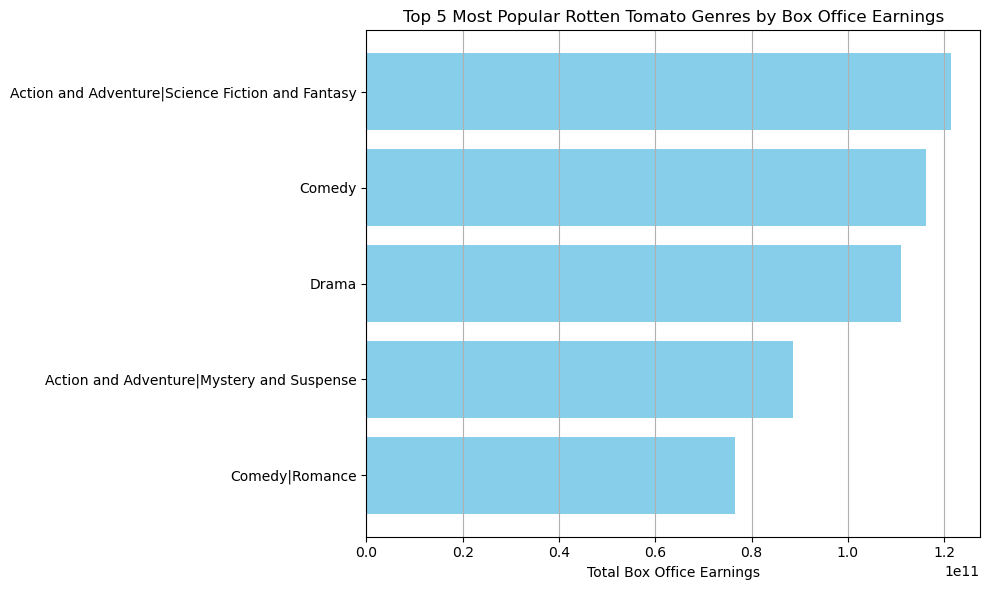

In [28]:
#Creating appropriate visualizations for the data above
rt_genres = rt_top_5_genres.index
rt_earnings = rt_top_5_genres.values
# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(rt_genres, rt_earnings, color='skyblue')
plt.xlabel('Total Box Office Earnings')
plt.title('Top 5 Most Popular Rotten Tomato Genres by Box Office Earnings')
plt.gca().invert_yaxis()  # Invert y-axis to display genres from top to bottom
plt.grid(axis='x')  # Add gridlines along the x-axis
plt.tight_layout()

# Show plot
plt.show()    

### Box Office Mojo Analysis

In [29]:
#Adding a profit column
# Convert 'foreign_gross' column to numeric
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')

# Calculate the 'profit' column by adding 'domestic_gross' and 'foreign_gross'
bom_movie['profit'] = bom_movie['domestic_gross'] + bom_movie['foreign_gross']

# Sort the DataFrame by the 'profit' column in descending order
bom_sorted_by_profit = bom_movie.sort_values(by='profit', ascending=False)

# Display the sorted DataFrame
print(bom_sorted_by_profit.head(10))  # Displaying the top 10 rows after sorting


                                            title studio  domestic_gross  \
727                         Marvel's The Avengers     BV     623400000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
3080                                Black Panther     BV     700100000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
1127                                       Frozen     BV     400700000.0   
2759                  Beauty and the Beast (2017)     BV     504000000.0   
3082                                Incredibles 2     BV     608600000.0   
1128                                   Iron Man 3     BV     409000000.0   

      foreign_gross  year        profit  
727     895500000.0  2012  1.518900e+09  
1875    946400000.0  2015  1.405400e+09  
3080    646900000.0  2018  1.347000e+

In [36]:
# Selecting only 'title', 'profit' and 'year' columns for the first 10 records
bom_top_10 = bom_sorted_by_profit[['title', 'profit','year']].head(10)
print(bom_top_10)



                                            title        profit  year
727                         Marvel's The Avengers  1.518900e+09  2012
1875                      Avengers: Age of Ultron  1.405400e+09  2015
3080                                Black Panther  1.347000e+09  2018
328   Harry Potter and the Deathly Hallows Part 2  1.341500e+09  2011
2758                     Star Wars: The Last Jedi  1.332600e+09  2017
3081               Jurassic World: Fallen Kingdom  1.309500e+09  2018
1127                                       Frozen  1.276400e+09  2013
2759                  Beauty and the Beast (2017)  1.263500e+09  2017
3082                                Incredibles 2  1.242800e+09  2018
1128                                   Iron Man 3  1.214800e+09  2013


In [37]:
#Adding genre names using the title column and TMDB API
# Replace 'YOUR_API_KEY' with your actual TMDb API key
tmdb_api_key = '70f9b8ce1aaffdf5ddb822e3975832a0' 

# Define a function to fetch genre information by movie title
def get_movie_genre(movie_title):
    url = f'https://api.themoviedb.org/3/search/movie'
    params = {'api_key': tmdb_api_key, 'query': movie_title}
    
    response = requests.get(url, params=params)
    data = response.json()
    
    if data['results']:
        # Assuming the first result is the most relevant match
        movie_id = data['results'][0]['id']
        movie_details_url = f'https://api.themoviedb.org/3/movie/{movie_id}'
        details_params = {'api_key': tmdb_api_key}
        
        details_response = requests.get(movie_details_url, params=details_params)
        details_data = details_response.json()
        
        genres = [genre['name'] for genre in details_data['genres']]
        return genres
    else:
        return None
#Create a new column 'genres' in bom_top_10 dataframe
bom_top_10['genres'] = None
# Fetch genres for each movie in the DataFrame
for index, row in bom_top_10.iterrows():
    movie_title = row['title']
    genres = get_movie_genre(movie_title)
    
    if genres:
        bom_top_10.at[index, 'genres'] = ', '.join(genres)
    else:
        bom_top_10.at[index, 'genres'] = 'Not Found'

print(bom_top_10)


                                            title        profit  year  \
727                         Marvel's The Avengers  1.518900e+09  2012   
1875                      Avengers: Age of Ultron  1.405400e+09  2015   
3080                                Black Panther  1.347000e+09  2018   
328   Harry Potter and the Deathly Hallows Part 2  1.341500e+09  2011   
2758                     Star Wars: The Last Jedi  1.332600e+09  2017   
3081               Jurassic World: Fallen Kingdom  1.309500e+09  2018   
1127                                       Frozen  1.276400e+09  2013   
2759                  Beauty and the Beast (2017)  1.263500e+09  2017   
3082                                Incredibles 2  1.242800e+09  2018   
1128                                   Iron Man 3  1.214800e+09  2013   

                                            genres  
727             Science Fiction, Action, Adventure  
1875            Action, Adventure, Science Fiction  
3080            Action, Adventure, Sc

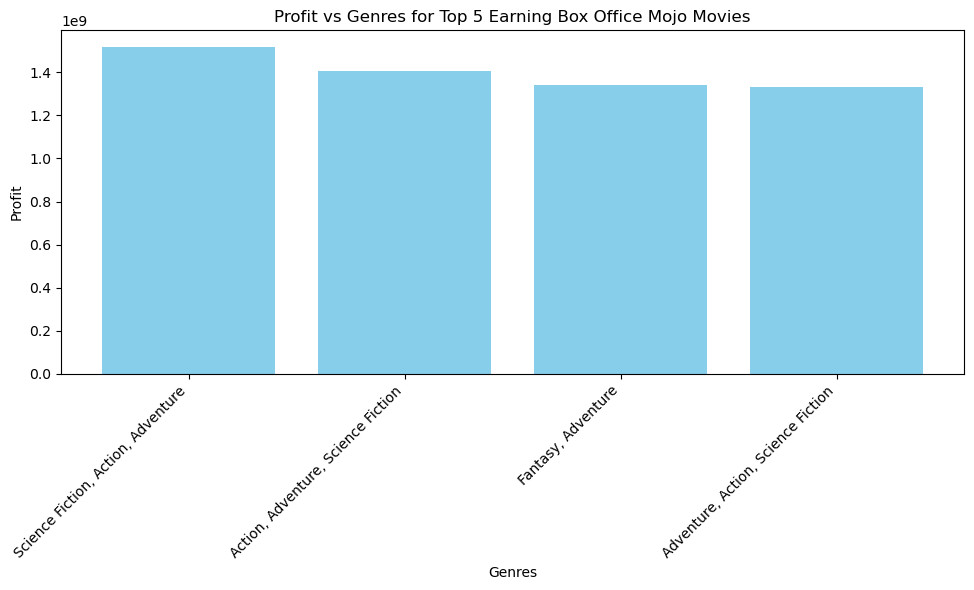

In [32]:
#Creating a visualization from the above data
bom_top_5_movies = bom_top_10.head(5)

# Creating a bar plot for profit vs genres
plt.figure(figsize=(10, 6))
plt.bar(bom_top_5_movies['genres'], bom_top_5_movies['profit'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Profit vs Genres for Top 5 Earning Box Office Mojo Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5) Conclusions
- The 5 most popular genres from the data above are : 
    1. Drama
    1. Comedy
    1. Action and Adventure
    1. Romance
    1. Thrillers

- The movies of the genre Action have the best box office performance. This is attributed by the box office earnings

- The movies with the highest ratings and best reviews are positively correlated with performing well in the box office 

# 6) Recommendations
- Microsoft Studio should consider releasing movie content that revolves around the 5 most popular genres above due to their popularity which is a significant fact to consider since popularity generally attributes to box office success.

- Microsoft studio should also consider focusing on ratings and reviews from diferent movies. This will help in coming up with better informed decisions that are crucial in determining their success at the box office.

- Microsoft studio should also consider incorporating much newer movie titles to their lineup of movies. This will assist in maintaining relevance in the box office industry.